# MUSIC Bayesian Regression - CoB291

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import pymc3 as pm
import pandas as pd
from scipy import stats

In [2]:
#eMpowerment
M =   (6, 5, 3.8, 6, 4.2, 5, 5.8, 5, 4.6, 5.2, 5.4, 3, 3.2, 4.4, 4.8, 3.4, 4.8, 4.2, 3.6, 4.8, 4.6, 4, 5, 5.6, 4.2, 
       4.6, 4.6, 6, 4.6, 3.8, 3.6, 5.6, 4.4, 6, 5.2, 5.4, 6, 5.2, 4, 4, 3, 4.2, 4, 3.6, 4.8, 5.4, 6, 4.6)

#Usefulness
U =   (6, 5.8, 4.2, 6, 4.4, 5.8, 6, 5.8, 4.4, 5, 5.8, 4.6, 4, 6, 5.4, 3.8, 4.8, 5, 3.2, 5.2, 5.8, 5, 5, 4.6, 4.8, 
       5.2, 4.6, 6, 4.6, 5.4, 6, 4.4, 5.6, 6, 6, 6, 6, 5.8, 5, 5.4, 4.6, 3.8, 4.4, 3.8, 5.4, 4.4, 6, 4.6) 

#Success
S =   (6, 5.5, 4, 5.5, 4, 5.25, 5.75, 5.25, 4.5, 4.75, 3, 4, 4.5, 4.75, 6, 4.25, 4.75, 4.5, 3.5, 5, 5, 4.75, 5, 
       4.25, 5, 4.75, 4.75, 6, 5.25, 4.75, 4.25, 4.25, 4, 4.75, 5.75, 5.75, 6, 5, 4, 5.25, 3.25, 4, 3.75, 4.25, 4.5, 3.5, 6, 5)

#Interest
I =   (6, 5.17, 4.17, 5.67, 4.67, 5.83, 6, 5.83, 5.17, 4.67, 4.67, 5, 4.5, 5.17, 5.33, 4.83, 4.5, 5.5, 3.5, 5.17,
       5.67, 4.17, 5.67, 5.33, 4.17, 5, 4.83, 6, 4.33, 4.17, 5.83, 3.33, 4.17, 5.67, 5.83, 5.67, 6, 5.67, 4.83,
       5.67, 3.83, 4.33, 4.67, 4.5, 5.67, 4.67, 6, 4.83)

#Caring
C =   (6, 5.5, 5.83, 6, 4.83, 5.83, 6, 6, 6, 5.67, 6, 5.83, 4.83, 5.83, 6, 5, 5.83, 6, 5, 5.5, 5.67, 6, 6, 6, 5, 6,
       5.83, 6, 6, 4.67, 5.17, 5.67, 5.83, 6, 6, 6, 6, 5.67, 6, 6, 5.83, 5.5, 6, 5.83, 6, 5.83, 6, 5.5)

#Effort
E =   (6, 5.5, 3.75, 6, 3.25, 5.25, 5.75, 6, 5, 5.5, 6, 3.5, 5, 6, 5, 4.75, 4.5, 5, 4.5, 5.5, 5.25, 4, 5, 5.75, 4.25,
       4.75, 5, 6, 4.75, 4.75, 6, 4.75, 5.25, 4.75, 4.5, 6, 5.75, 5.25, 6, 5.75, 5.5, 5.25, 2.75, 4.25, 5, 4.75, 6, 6)

#Final Grade
FG =  (80, 97.83, 70.83, 84.5, 74.17, 85.17, 88.17, 87.5, 83.83, 80.67, 75.5, 80.17, 86.17, 80.5, 97.33, 89.17, 96,
       72.17, 68, 81.5, 86.33, 73.83, 90.33, 82.5, 85.67, 77.17, 72.83, 90.17, 79, 77.5, 80, 74, 78.67, 76.5, 83, 97.17,
       94, 82.67, 86, 90.67, 81.33, 72.5, 79.5, 87, 79.67, 71.83, 85.5, 93.17)

#Instructor Rating
IR = (6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6,
      6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5)

#Course Rating
CR = (6, 6, 4, 5, 6, 5, 6, 5, 4, 5, 4, 4, 4, 5, 5, 4, 5, 4, 1, 5, 5, 4, 5, 4, 5, 5, 4, 6, 4, 4, 3, 1, 4, 4, 6, 4, 6,
      5, 4, 6, 3, 4, 4, 5, 6, 3, 6, 4)

Empowerment = np.array(M) 
Usefulness  = np.array(U)
Success     = np.array(S)
Interest    = np.array(I)
Caring      = np.array(C)
Effort      = np.array(E)
FinalGrade  = np.array(FG)
InsRating   = np.array(IR)
CourRating  = np.array(CR)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigmaEFFORT, betaEFFORT, alphaEFFORT]
Sampling 4 chains: 100%|██████████████████████████████████████████████████████| 22000/22000 [01:56<00:00, 92.83draws/s]


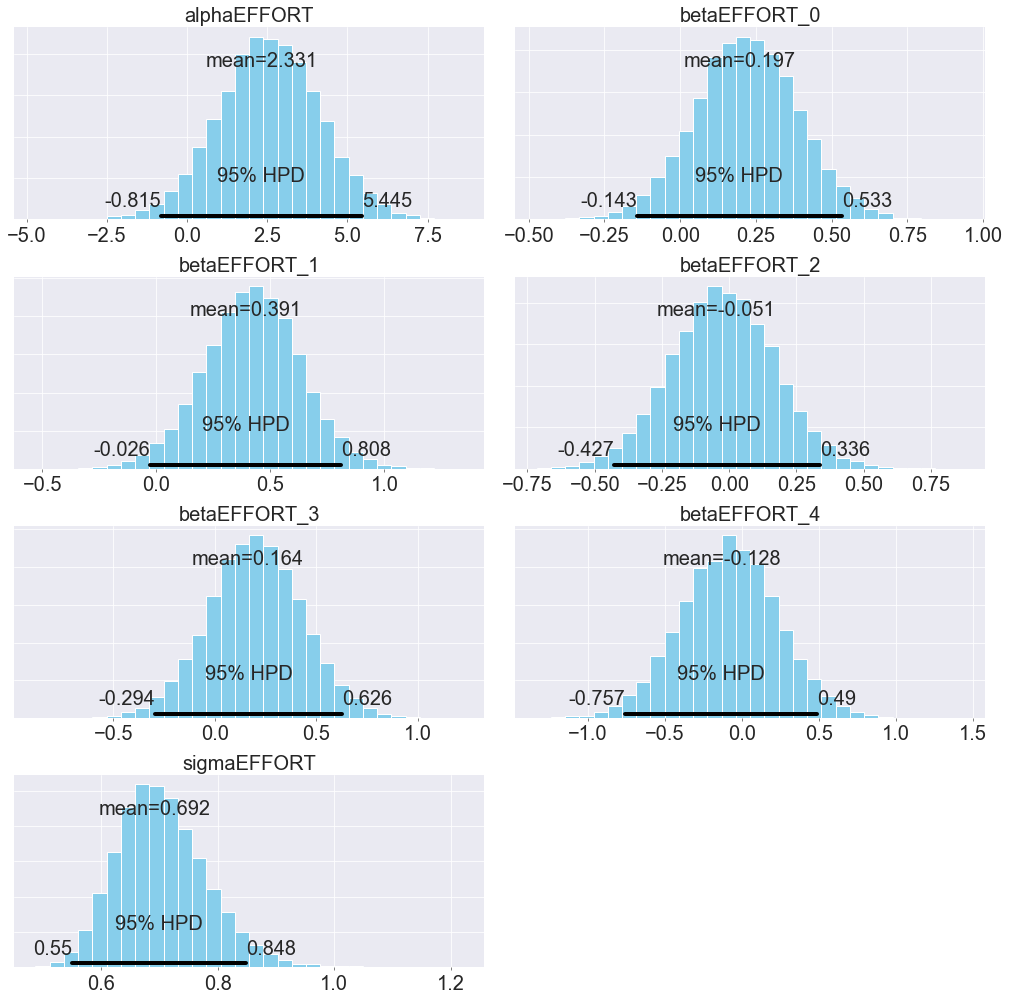

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


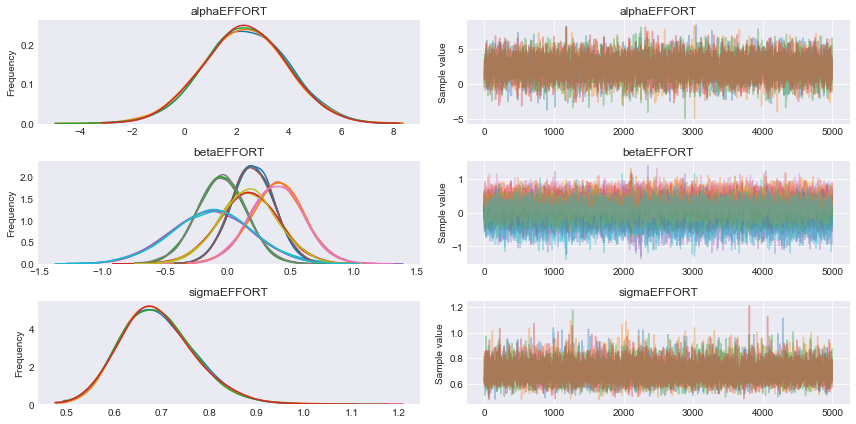

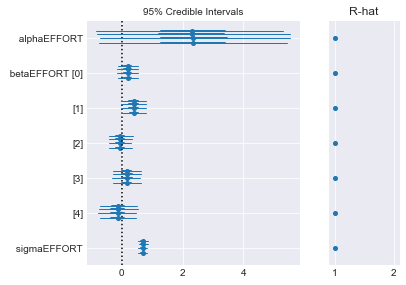

In [3]:
# EFFORT MODEL

modelA = pm.Model()

with modelA:

    # Priors for unknown model parameters
    alphaEFFORT = pm.Normal('alphaEFFORT', mu=0, sd=10)
    betaEFFORT  = pm.Normal('betaEFFORT', mu=0, sd=10, shape=5)
    sigmaEFFORT = pm.HalfNormal('sigmaEFFORT', sd=1)

    # Expected value of outcome
    muEFFORT = alphaEFFORT + betaEFFORT[0]*Empowerment + betaEFFORT[1]*Usefulness + betaEFFORT[2]*Success + betaEFFORT[3]*Interest + betaEFFORT[4]*Caring

    # Likelihood (sampling distribution) of observations
    Effort_obs = pm.Normal('Effort_obs', mu = muEFFORT, sd = sigmaEFFORT, observed = Effort)
    
    #MCMC 4 chains
    traceEFFORT = pm.sample(5000, cores=4)
    pm.plot_posterior(traceEFFORT, figsize = (14, 14), text_size=20, color='#87ceeb')
    plt.show()
    
pm.traceplot(traceEFFORT) # ==> A simple posterior plot can be created using traceplot.
plt.show()
pm.forestplot(traceEFFORT);


In [4]:
ppcEffort = pm.sample_ppc(traceEFFORT, samples=1000, model=modelA)
print(pm.stats.r2_score(Effort, ppcEffort['Effort_obs']))
pm.summary(traceEFFORT).round(2)

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1497.21it/s]


r2_r(r2_median=0.44, r2_mean=0.44, r2_std=0.0)


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alphaEFFORT,2.33,1.60,0.02,-0.82,5.45,9958.36,1.0
betaEFFORT__0,0.20,0.17,0.00,-0.14,0.53,11241.11,1.0
betaEFFORT__1,0.39,0.21,0.00,-0.03,0.81,11011.25,1.0
betaEFFORT__2,-0.05,0.19,0.00,-0.43,0.34,12254.20,1.0
betaEFFORT__3,0.16,0.23,0.00,-0.29,0.63,11440.58,1.0
betaEFFORT__4,-0.13,0.32,0.00,-0.76,0.49,9719.65,1.0
sigmaEFFORT,0.69,0.08,0.00,0.55,0.85,13318.52,1.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigmaFINALGRADE, betaFINALGRADE, alphaFINALGRADE]
Sampling 4 chains: 100%|█████████████████████████████████████████████████████| 22000/22000 [01:15<00:00, 290.92draws/s]


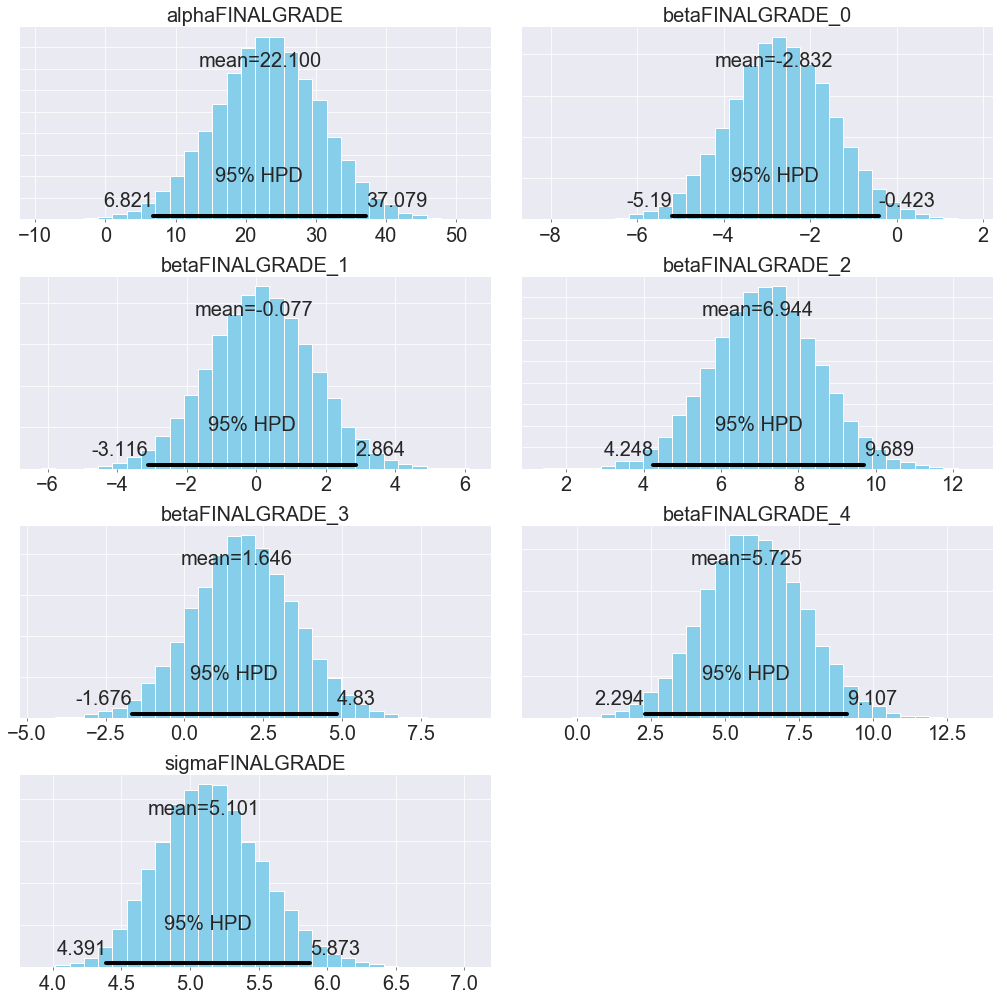

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


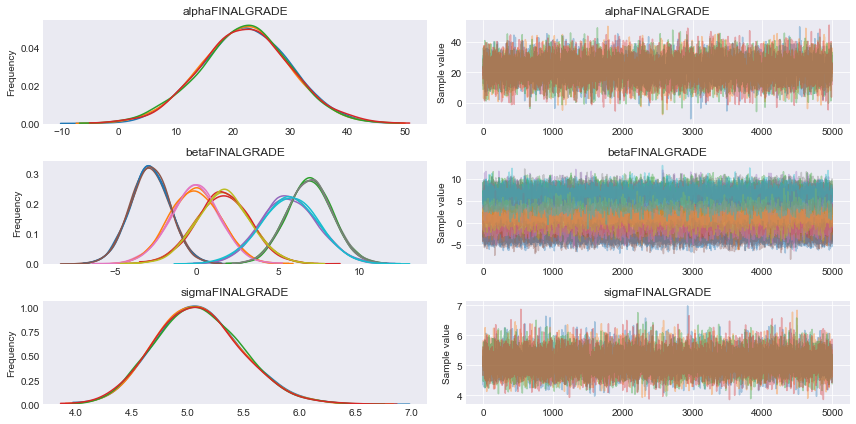

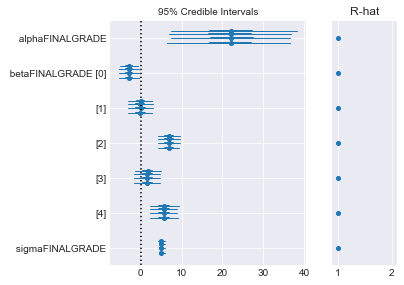

In [5]:
#FINAL GRADE MODEL

modelB = pm.Model()

with modelB:

    # Priors for unknown model parameters
    alphaFINALGRADE = pm.Normal('alphaFINALGRADE', mu=0, sd=10)
    betaFINALGRADE  = pm.Normal('betaFINALGRADE', mu=0, sd=10, shape=5)
    sigmaFINALGRADE = pm.HalfNormal('sigmaFINALGRADE', sd=1)

    # Expected value of outcome
    muFINALGRADE = alphaFINALGRADE + betaFINALGRADE[0]*Empowerment + betaFINALGRADE[1]*Usefulness + betaFINALGRADE[2]*Success + betaFINALGRADE[3]*Interest + betaFINALGRADE[4]*Caring

    # Likelihood (sampling distribution) of observations
    FinalGrade_obs = pm.Normal('FinalGrade_obs', mu = muFINALGRADE, sd = sigmaFINALGRADE, observed = FinalGrade)
    
    #MCMC 4 chains
    traceFINALGRADE = pm.sample(5000, cores=4)
    pm.plot_posterior(traceFINALGRADE, figsize = (14, 14), text_size=20, color='#87ceeb')
    plt.show()
    
pm.traceplot(traceFINALGRADE) # ==> A simple posterior plot can be created using traceplot.
plt.show()
pm.forestplot(traceFINALGRADE);

In [6]:
ppcFG = pm.sample_ppc(traceFINALGRADE, samples=1000, model=modelB)
print(pm.stats.r2_score(FinalGrade, ppcFG['FinalGrade_obs']))
pm.summary(traceFINALGRADE).round(2)

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1721.90it/s]


r2_r(r2_median=0.49, r2_mean=0.49, r2_std=0.0)


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alphaFINALGRADE,22.10,7.70,0.09,6.82,37.08,10229.01,1.0
betaFINALGRADE__0,-2.83,1.21,0.01,-5.19,-0.42,14133.25,1.0
betaFINALGRADE__1,-0.08,1.53,0.01,-3.12,2.86,14014.85,1.0
betaFINALGRADE__2,6.94,1.39,0.01,4.25,9.69,12744.39,1.0
betaFINALGRADE__3,1.65,1.66,0.01,-1.68,4.83,12114.69,1.0
betaFINALGRADE__4,5.73,1.74,0.02,2.29,9.11,9584.42,1.0
sigmaFINALGRADE,5.10,0.38,0.00,4.39,5.87,16446.99,1.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigmaINSTRUCTORRATING, betaINSTRUCTORRATING, alphaINSTRUCTORRATING]
Sampling 4 chains: 100%|█████████████████████████████████████████████████████| 22000/22000 [01:41<00:00, 217.53draws/s]


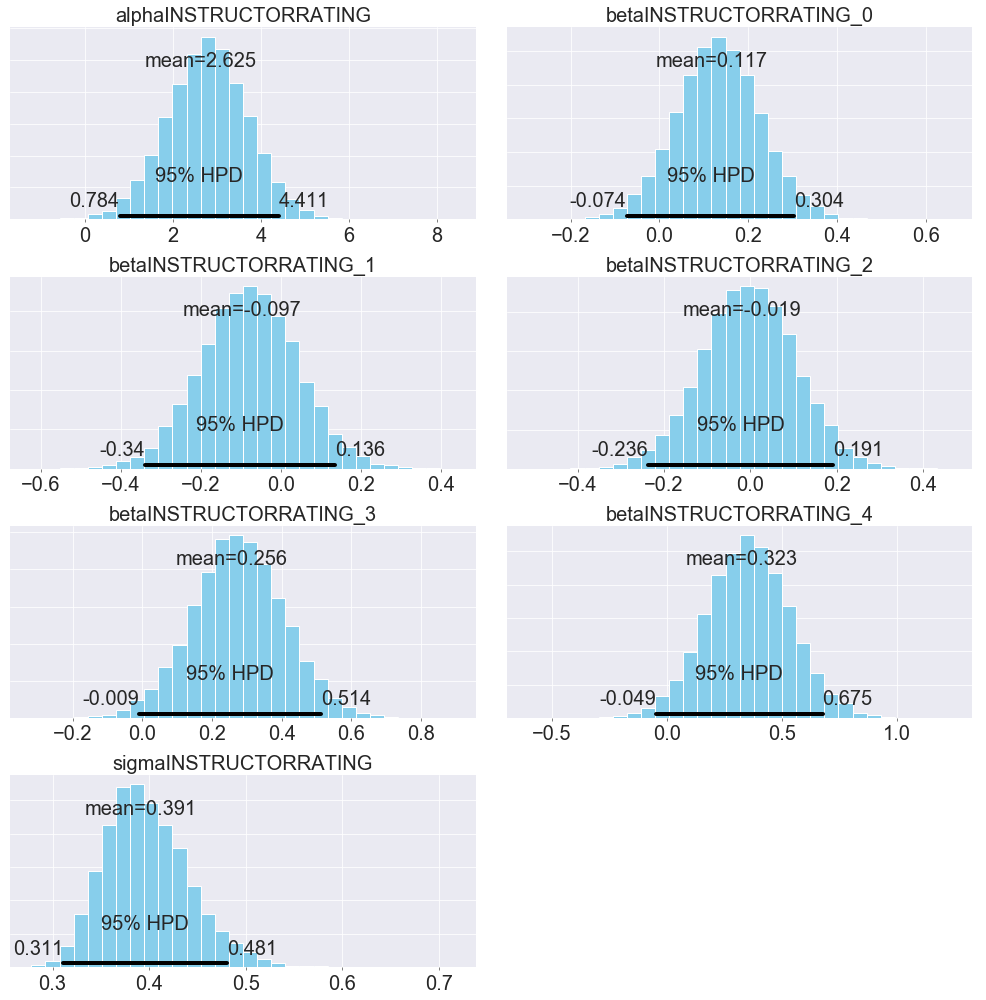

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


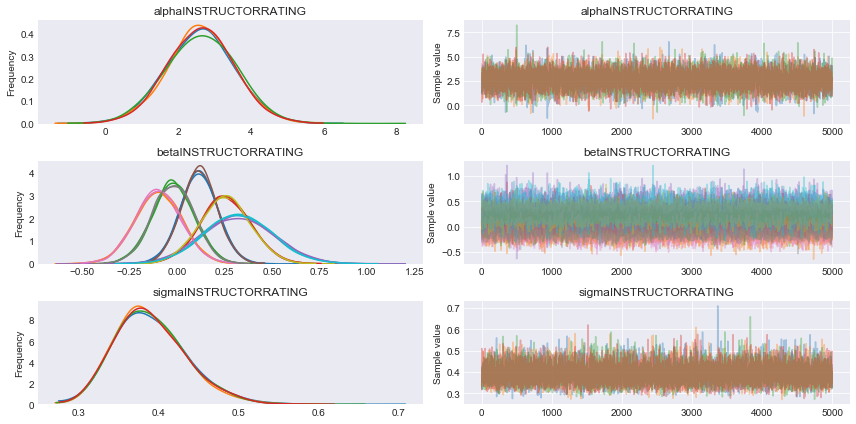

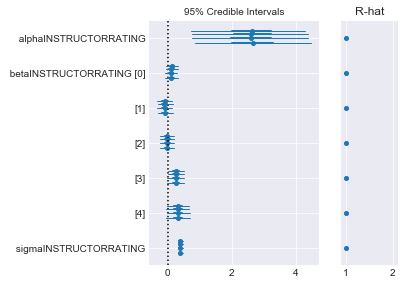

In [7]:
#INSTRUCTOR RATING MODEL

modelC = pm.Model()

with modelC:

    # Priors for unknown model parameters
    alphaINSTRUCTORRATING = pm.Normal('alphaINSTRUCTORRATING', mu=0, sd=10)
    betaINSTRUCTORRATING  = pm.Normal('betaINSTRUCTORRATING', mu=0, sd=10, shape=5)
    sigmaINSTRUCTORRATING = pm.HalfNormal('sigmaINSTRUCTORRATING', sd=1)

    # Expected value of outcome
    muINSTRUCTORRATING = alphaINSTRUCTORRATING + betaINSTRUCTORRATING[0]*Empowerment + betaINSTRUCTORRATING[1]*Usefulness + betaINSTRUCTORRATING[2]*Success + betaINSTRUCTORRATING[3]*Interest + betaINSTRUCTORRATING[4]*Caring

    # Likelihood (sampling distribution) of observations
    InstructorRating_obs = pm.Normal('InstructorRating_obs', mu = muINSTRUCTORRATING, sd = sigmaINSTRUCTORRATING, observed = InsRating)
    
    #MCMC 4 chains
    traceINSTRUCTORRATING = pm.sample(5000, cores=4)
    pm.plot_posterior(traceINSTRUCTORRATING, figsize = (14, 14), text_size=20, color='#87ceeb')
    plt.show()
    
pm.traceplot(traceINSTRUCTORRATING) # ==> A simple posterior plot can be created using traceplot.
plt.show()
pm.forestplot(traceINSTRUCTORRATING);

In [8]:
ppcIR = pm.sample_ppc(traceINSTRUCTORRATING, samples=1000, model=modelC)
print(pm.stats.r2_score(InsRating, ppcIR['InstructorRating_obs']))
pm.summary(traceINSTRUCTORRATING).round(2)

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1593.13it/s]


r2_r(r2_median=0.45, r2_mean=0.45, r2_std=0.0)


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alphaINSTRUCTORRATING,2.62,0.93,0.01,0.78,4.41,9524.40,1.0
betaINSTRUCTORRATING__0,0.12,0.10,0.00,-0.07,0.30,12560.71,1.0
betaINSTRUCTORRATING__1,-0.10,0.12,0.00,-0.34,0.14,11825.41,1.0
betaINSTRUCTORRATING__2,-0.02,0.11,0.00,-0.24,0.19,12432.79,1.0
betaINSTRUCTORRATING__3,0.26,0.13,0.00,-0.01,0.51,11610.30,1.0
betaINSTRUCTORRATING__4,0.32,0.18,0.00,-0.05,0.68,9226.41,1.0
sigmaINSTRUCTORRATING,0.39,0.04,0.00,0.31,0.48,12260.80,1.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigmaCOURSERATING, betaCOURSERATING, alphaCOURSERATING]
Sampling 4 chains: 100%|█████████████████████████████████████████████████████| 22000/22000 [01:40<00:00, 218.39draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


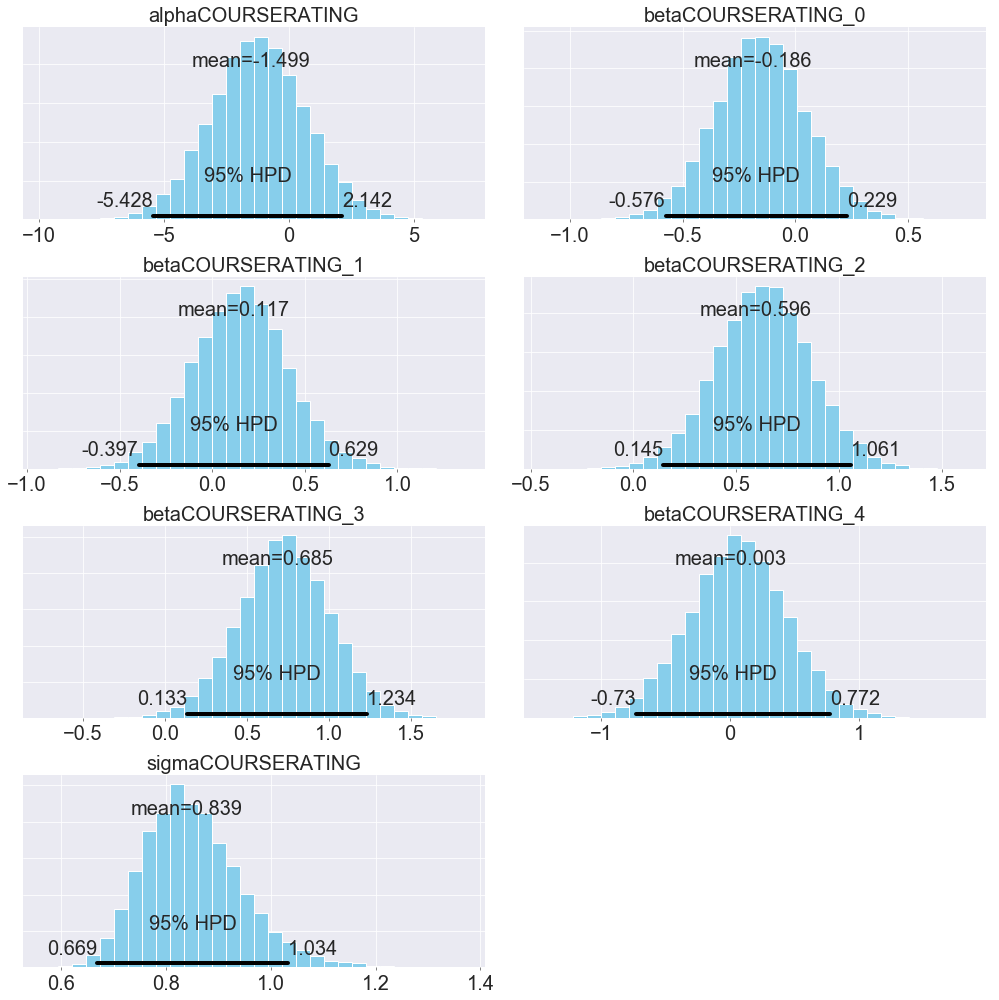

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


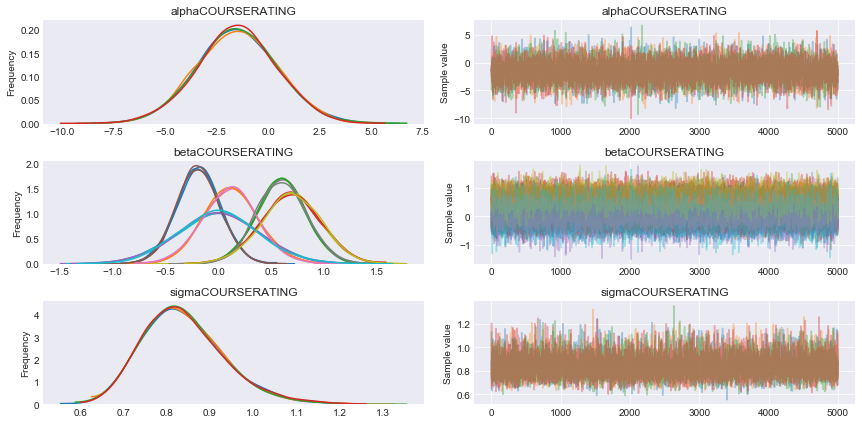

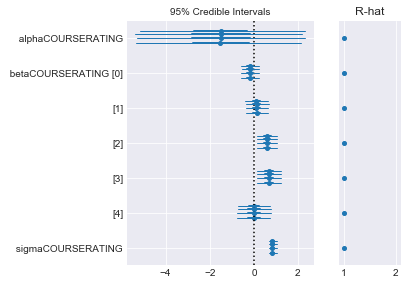

In [9]:
#COURSE RATING MODEL

modeld = pm.Model()

with modeld:

    # Priors for unknown model parameters
    alphaCOURSERATING = pm.Normal('alphaCOURSERATING', mu=0, sd=10)
    betaCOURSERATING  = pm.Normal('betaCOURSERATING', mu=0, sd=10, shape=5)
    sigmaCOURSERATING = pm.HalfNormal('sigmaCOURSERATING', sd=1)

    # Expected value of outcome
    muCOURSERATING = alphaCOURSERATING + betaCOURSERATING[0]*Empowerment + betaCOURSERATING[1]*Usefulness + betaCOURSERATING[2]*Success + betaCOURSERATING[3]*Interest + betaCOURSERATING[4]*Caring

    # Likelihood (sampling distribution) of observations
    CourseRating_obs = pm.Normal('CourseRating_obs', mu = muCOURSERATING, sd = sigmaCOURSERATING, observed = CourRating)
    
    #MCMC 4 chains
    traceCOURSERATING = pm.sample(5000, cores=4)
    pm.plot_posterior(traceCOURSERATING, figsize = (14, 14), text_size=20, color='#87ceeb')
    plt.show()
    
pm.traceplot(traceCOURSERATING) # ==> A simple posterior plot can be created using traceplot.
plt.show()
pm.forestplot(traceCOURSERATING);

In [10]:
ppcCR = pm.sample_ppc(traceCOURSERATING, samples=1000, model=modeld)
print(pm.stats.r2_score(CourRating, ppcCR['CourseRating_obs']))
pm.summary(traceCOURSERATING).round(2)

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1669.89it/s]


r2_r(r2_median=0.52, r2_mean=0.52, r2_std=0.0)


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alphaCOURSERATING,-1.50,1.93,0.02,-5.43,2.14,8748.61,1.0
betaCOURSERATING__0,-0.19,0.20,0.00,-0.58,0.23,12246.99,1.0
betaCOURSERATING__1,0.12,0.26,0.00,-0.40,0.63,12865.76,1.0
betaCOURSERATING__2,0.60,0.23,0.00,0.15,1.06,13275.09,1.0
betaCOURSERATING__3,0.68,0.28,0.00,0.13,1.23,12144.54,1.0
betaCOURSERATING__4,0.00,0.38,0.00,-0.73,0.77,8333.25,1.0
sigmaCOURSERATING,0.84,0.09,0.00,0.67,1.03,11896.73,1.0


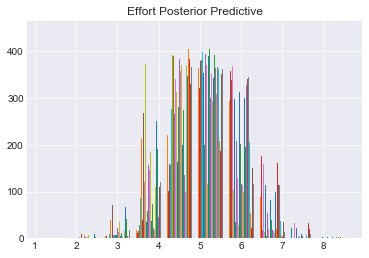

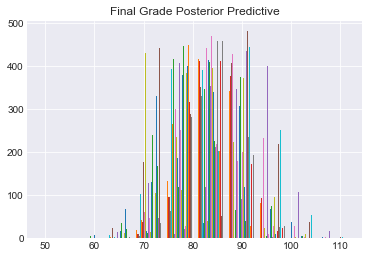

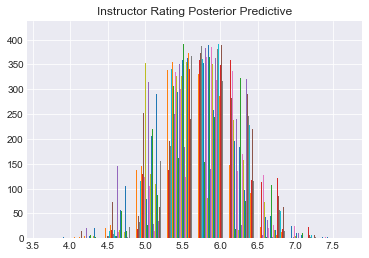

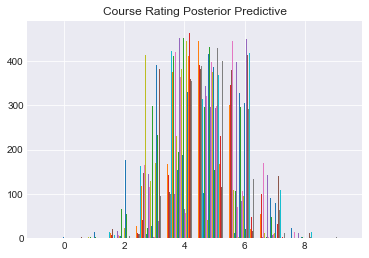

In [11]:
plt.hist(ppcEffort['Effort_obs'])
plt.title("Effort Posterior Predictive")
plt.show()
plt.hist(ppcFG['FinalGrade_obs'])
plt.title("Final Grade Posterior Predictive")
plt.show()
plt.hist(ppcIR['InstructorRating_obs'])
plt.title("Instructor Rating Posterior Predictive")
plt.show()
plt.hist(ppcCR['CourseRating_obs'])
plt.title("Course Rating Posterior Predictive")
plt.show()
